In [3]:
from openTSNE import TSNE
from joblib import load
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
logNormalized_HVG_subset = load("C:\\Users\\luana\\Documents\\thesis\\data\\logNormalized_HVG_subset.pkl.gz")
metadata_subset = pd.read_csv("C:\\Users\\luana\\Documents\\thesis\\data\\downsampled_metadata.csv", index_col=False)

In [14]:
perplexity = max(20, int(0.12 * logNormalized_HVG_subset.shape[0]))
print(perplexity)

60


In [6]:
# Perform t-SNE
tsne = TSNE(perplexity=perplexity, n_jobs=-1, random_state=42, theta=0.7)
tsne_embedding = tsne.fit(logNormalized_HVG_subset)

In [7]:
# Convert t-SNE embedding to a DataFrame
tsne_df = pd.DataFrame(tsne_embedding, columns=['t-SNE 1', 't-SNE 2'])

# Merge t-SNE embedding with metadata
tsne_df = pd.concat([tsne_df, metadata_subset['CellType']], axis=1)

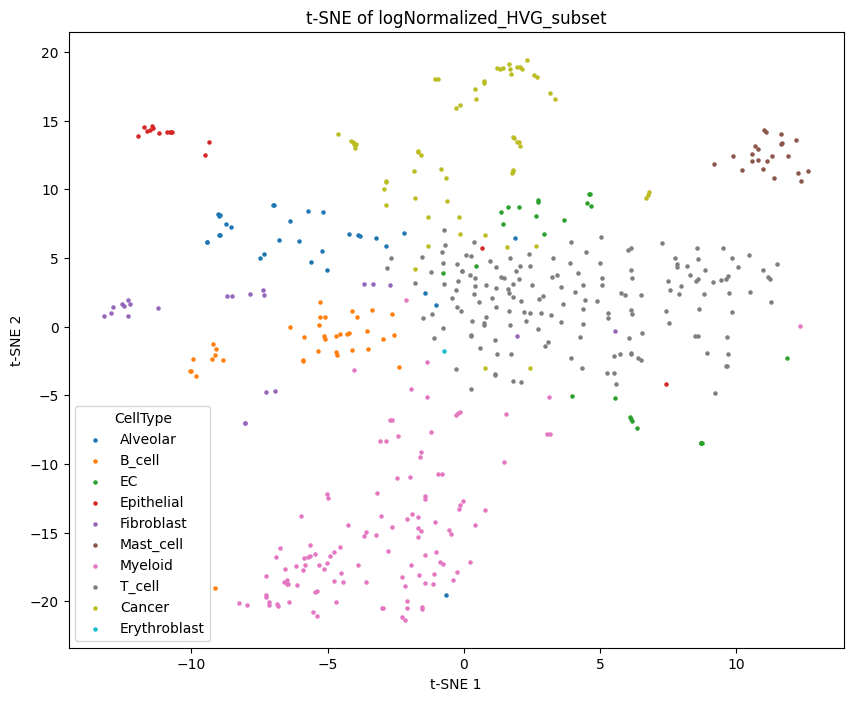

In [8]:
# Plot t-SNE with color coding based on CellType
plt.figure(figsize=(10, 8))
for cell_type in tsne_df['CellType'].unique():
    subset = tsne_df[tsne_df['CellType'] == cell_type]
    plt.scatter(subset['t-SNE 1'], subset['t-SNE 2'], s=5, label=cell_type)
plt.title('t-SNE of logNormalized_HVG_subset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='CellType')

In [ ]:
plt.savefig("C:\\Users\\luana\\Documents\\thesis\\plots\\tsne_plot.png", dpi=300)